In [10]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Load the Boston Housing dataset from your local path
column_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
    'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'
]

file_path = r'C:\Users\sanja\Downloads\housing.csv'

# Load dataset
data = pd.read_csv(file_path, header=None, delimiter=r"\s+", names=column_names)

# Split features and target
X = data.drop('MEDV', axis=1)
y = data['MEDV']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dictionary to store results
results = {}

# Helper function to evaluate models
def evaluate_model(name, model, Xtr, Xte):
    model.fit(Xtr, y_train)
    y_pred = model.predict(Xte)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2': r2}
    print(f"{name} => MSE: {mse:.4f}, R2: {r2:.4f}")

# 1. Linear Regression
evaluate_model("Linear Regression", LinearRegression(), X_train_scaled, X_test_scaled)

# 2. Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train_scaled)
X_poly_test = poly.transform(X_test_scaled)
evaluate_model("Polynomial Regression (deg=2)", LinearRegression(), X_poly_train, X_poly_test)

# 3. Ridge Regression
evaluate_model("Ridge Regression", Ridge(alpha=1.0), X_train_scaled, X_test_scaled)

# 4. Lasso Regression
evaluate_model("Lasso Regression", Lasso(alpha=0.1), X_train_scaled, X_test_scaled)

# 5. ElasticNet Regression
evaluate_model("ElasticNet Regression", ElasticNet(alpha=0.1, l1_ratio=0.5), X_train_scaled, X_test_scaled)

# 6. Decision Tree Regression
evaluate_model("Decision Tree", DecisionTreeRegressor(max_depth=5), X_train_scaled, X_test_scaled)

# 7. Random Forest Regression
evaluate_model("Random Forest", RandomForestRegressor(n_estimators=100), X_train_scaled, X_test_scaled)

# 8. Support Vector Regression
evaluate_model("SVR", SVR(kernel='rbf'), X_train_scaled, X_test_scaled)

# 9. K-Nearest Neighbors Regression
evaluate_model("KNN Regression", KNeighborsRegressor(n_neighbors=5), X_train_scaled, X_test_scaled)

# Summary Table
print("\n=== Regression Performance Summary ===")
results_df = pd.DataFrame(results).T.sort_values(by='R2', ascending=False)
print(results_df)


Linear Regression => MSE: 24.2911, R2: 0.6688
Polynomial Regression (deg=2) => MSE: 14.3147, R2: 0.8048
Ridge Regression => MSE: 24.3129, R2: 0.6685
Lasso Regression => MSE: 25.6567, R2: 0.6501
ElasticNet Regression => MSE: 25.2036, R2: 0.6563
Decision Tree => MSE: 8.4233, R2: 0.8851
Random Forest => MSE: 9.1289, R2: 0.8755
SVR => MSE: 25.6685, R2: 0.6500
KNN Regression => MSE: 20.6055, R2: 0.7190

=== Regression Performance Summary ===
                                     MSE        R2
Decision Tree                   8.423318  0.885137
Random Forest                   9.128927  0.875515
Polynomial Regression (deg=2)  14.314668  0.804801
KNN Regression                 20.605529  0.719017
Linear Regression              24.291119  0.668759
Ridge Regression               24.312904  0.668462
ElasticNet Regression          25.203553  0.656317
Lasso Regression               25.656739  0.650138
SVR                            25.668540  0.649977


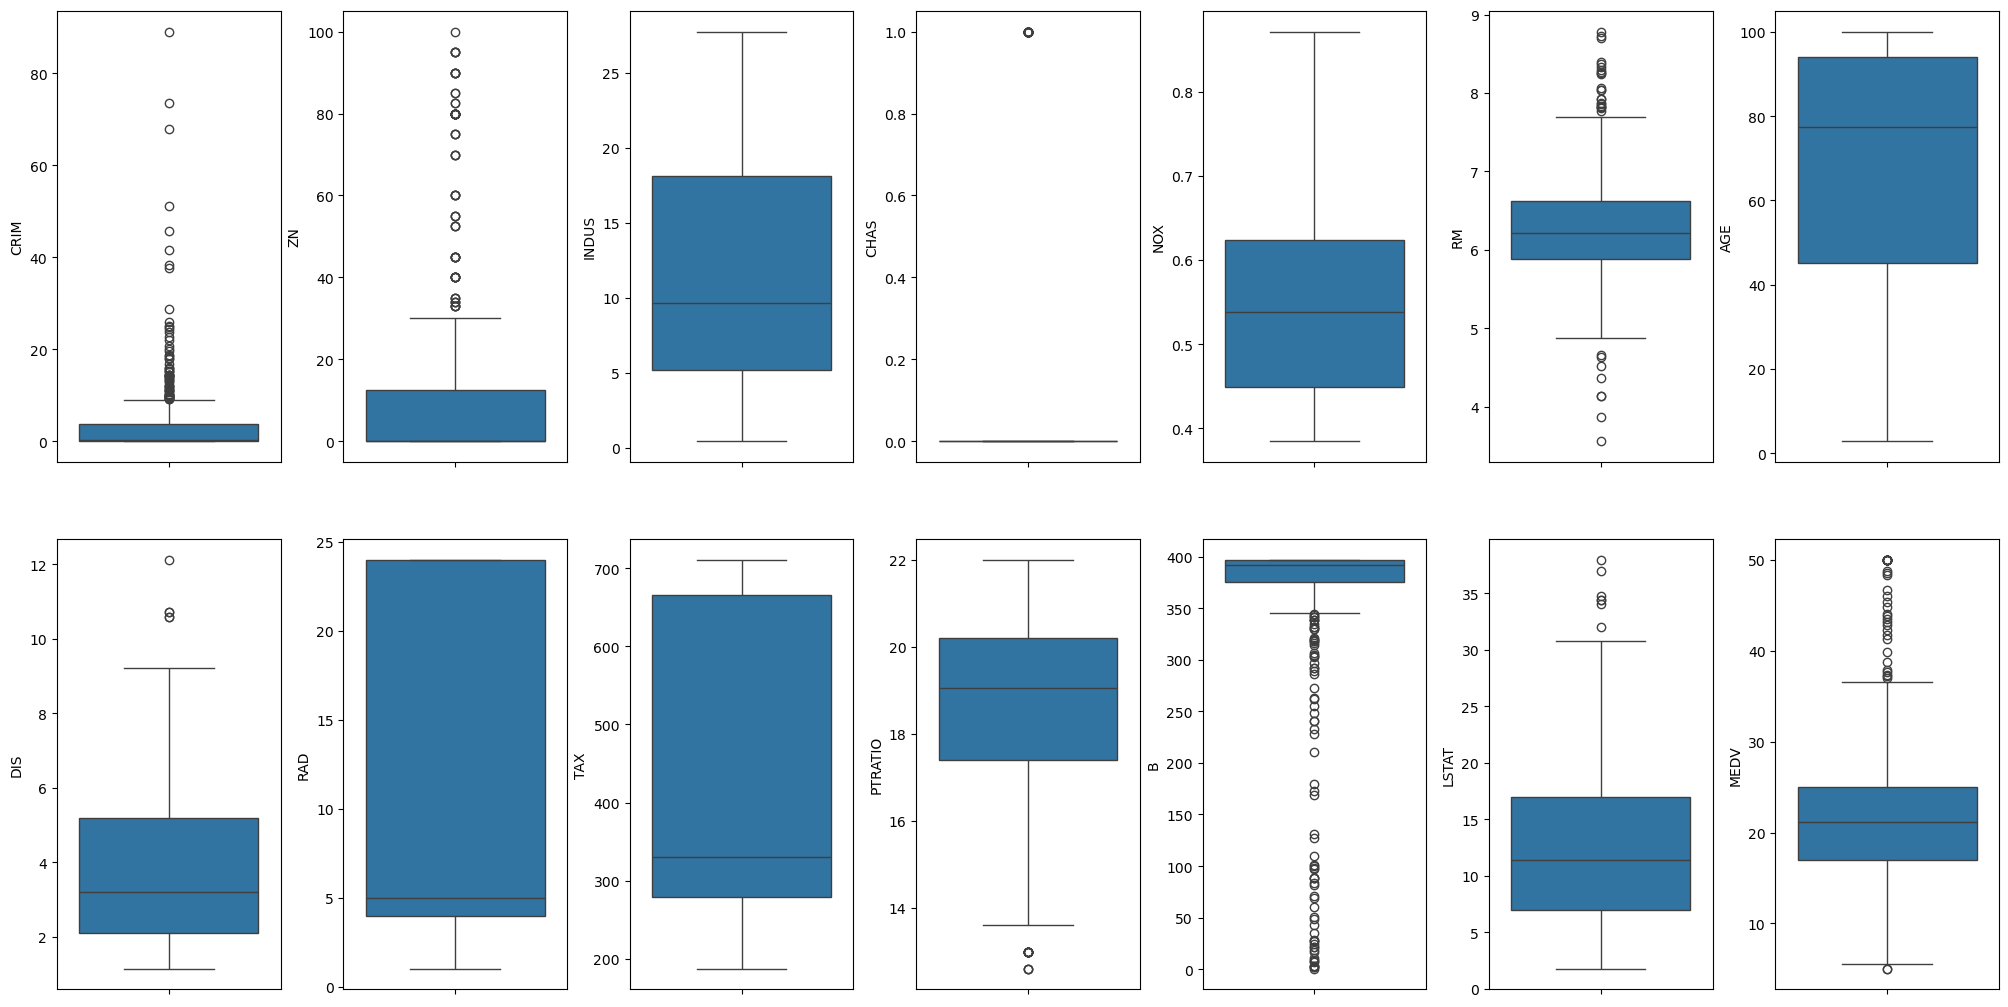

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.boxplot(y=k, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [14]:
for k, v in data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))
    

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


In [16]:
data = data[~(data['MEDV'] >= 50.0)]
print(np.shape(data))

(490, 14)


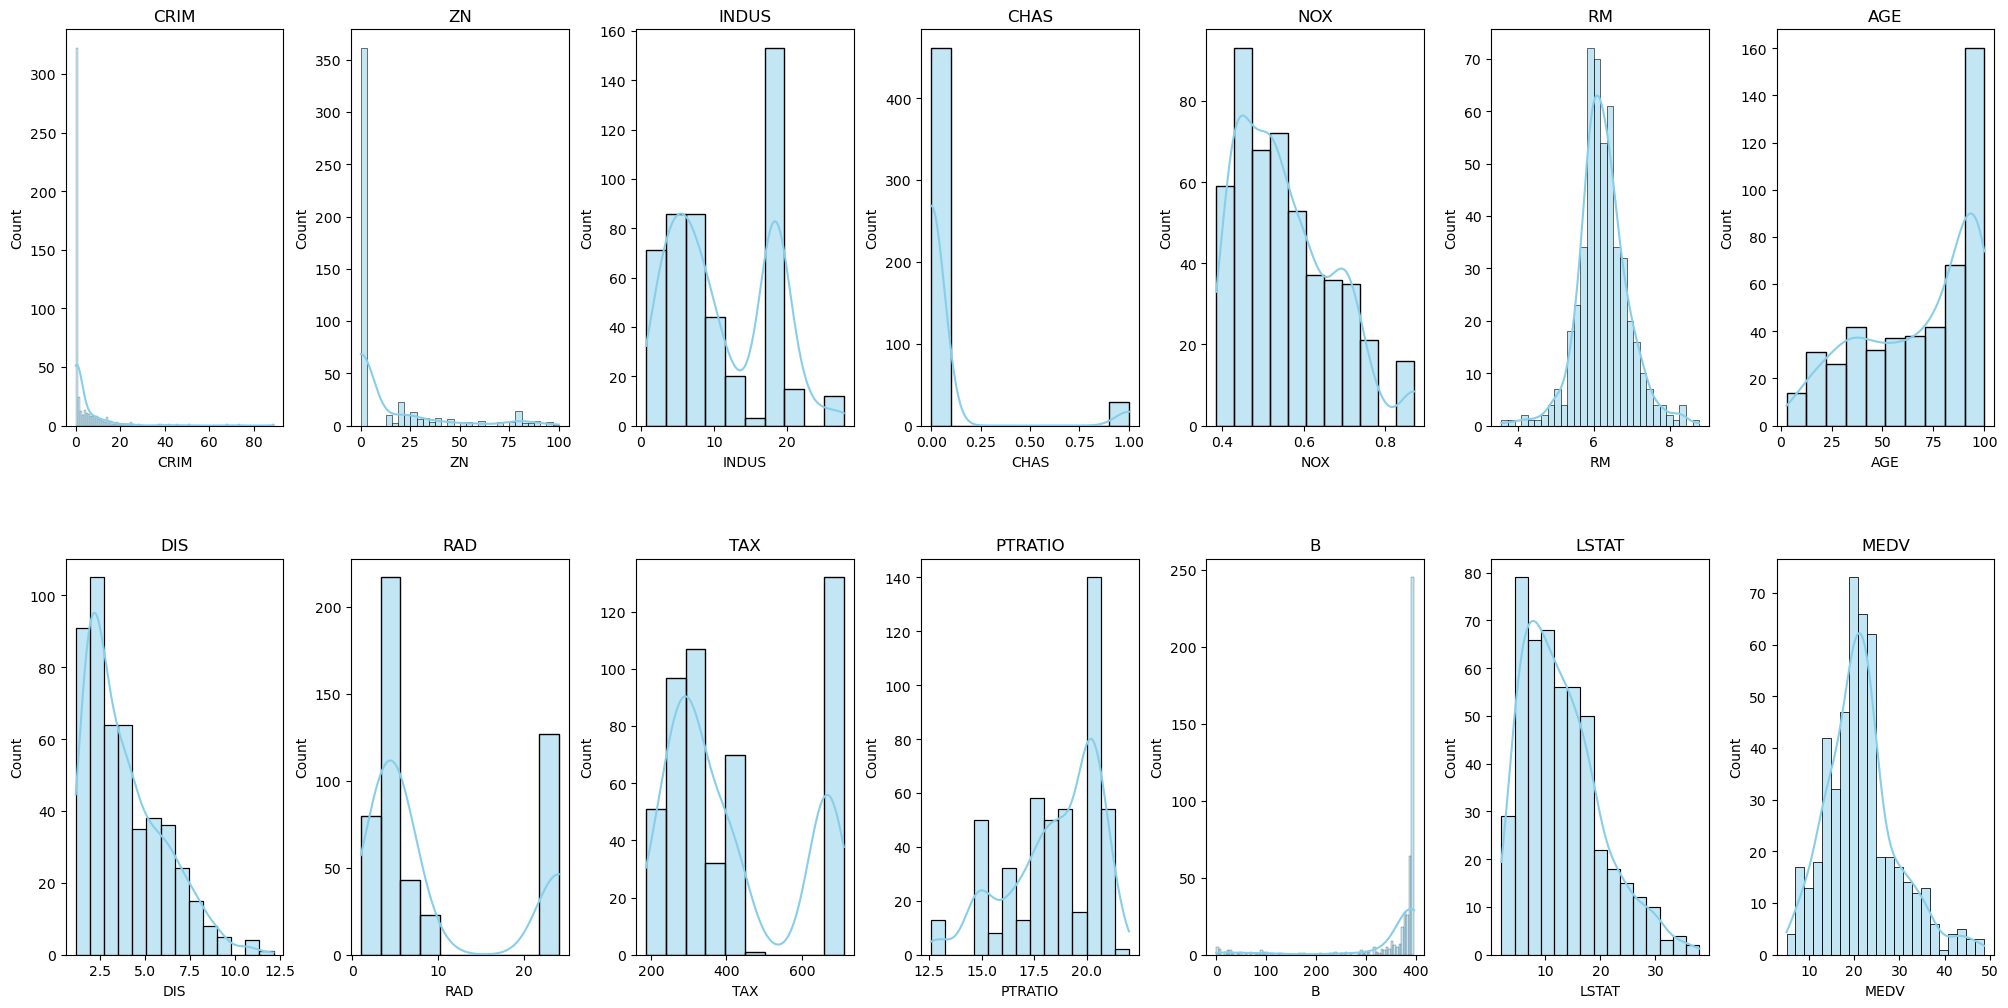

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots: 14 features, so 2 rows x 7 columns
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
axs = axs.flatten()

# Plot each feature
for index, (col_name, col_data) in enumerate(data.items()):
    sns.histplot(col_data, kde=True, ax=axs[index], color='skyblue')
    axs[index].set_title(col_name)

# Layout adjustments
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()


<Axes: >

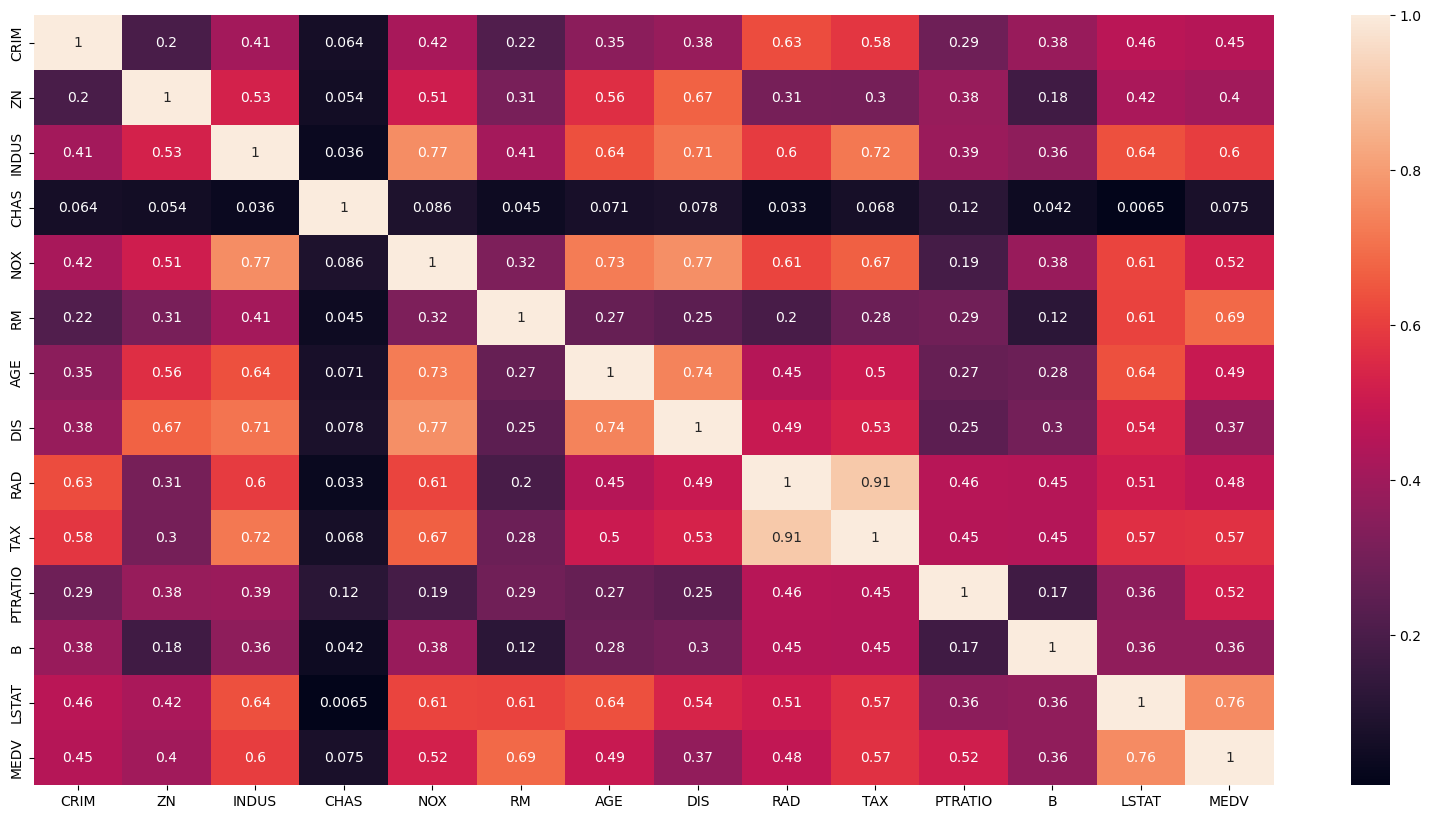

In [22]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr().abs(),  annot=True)

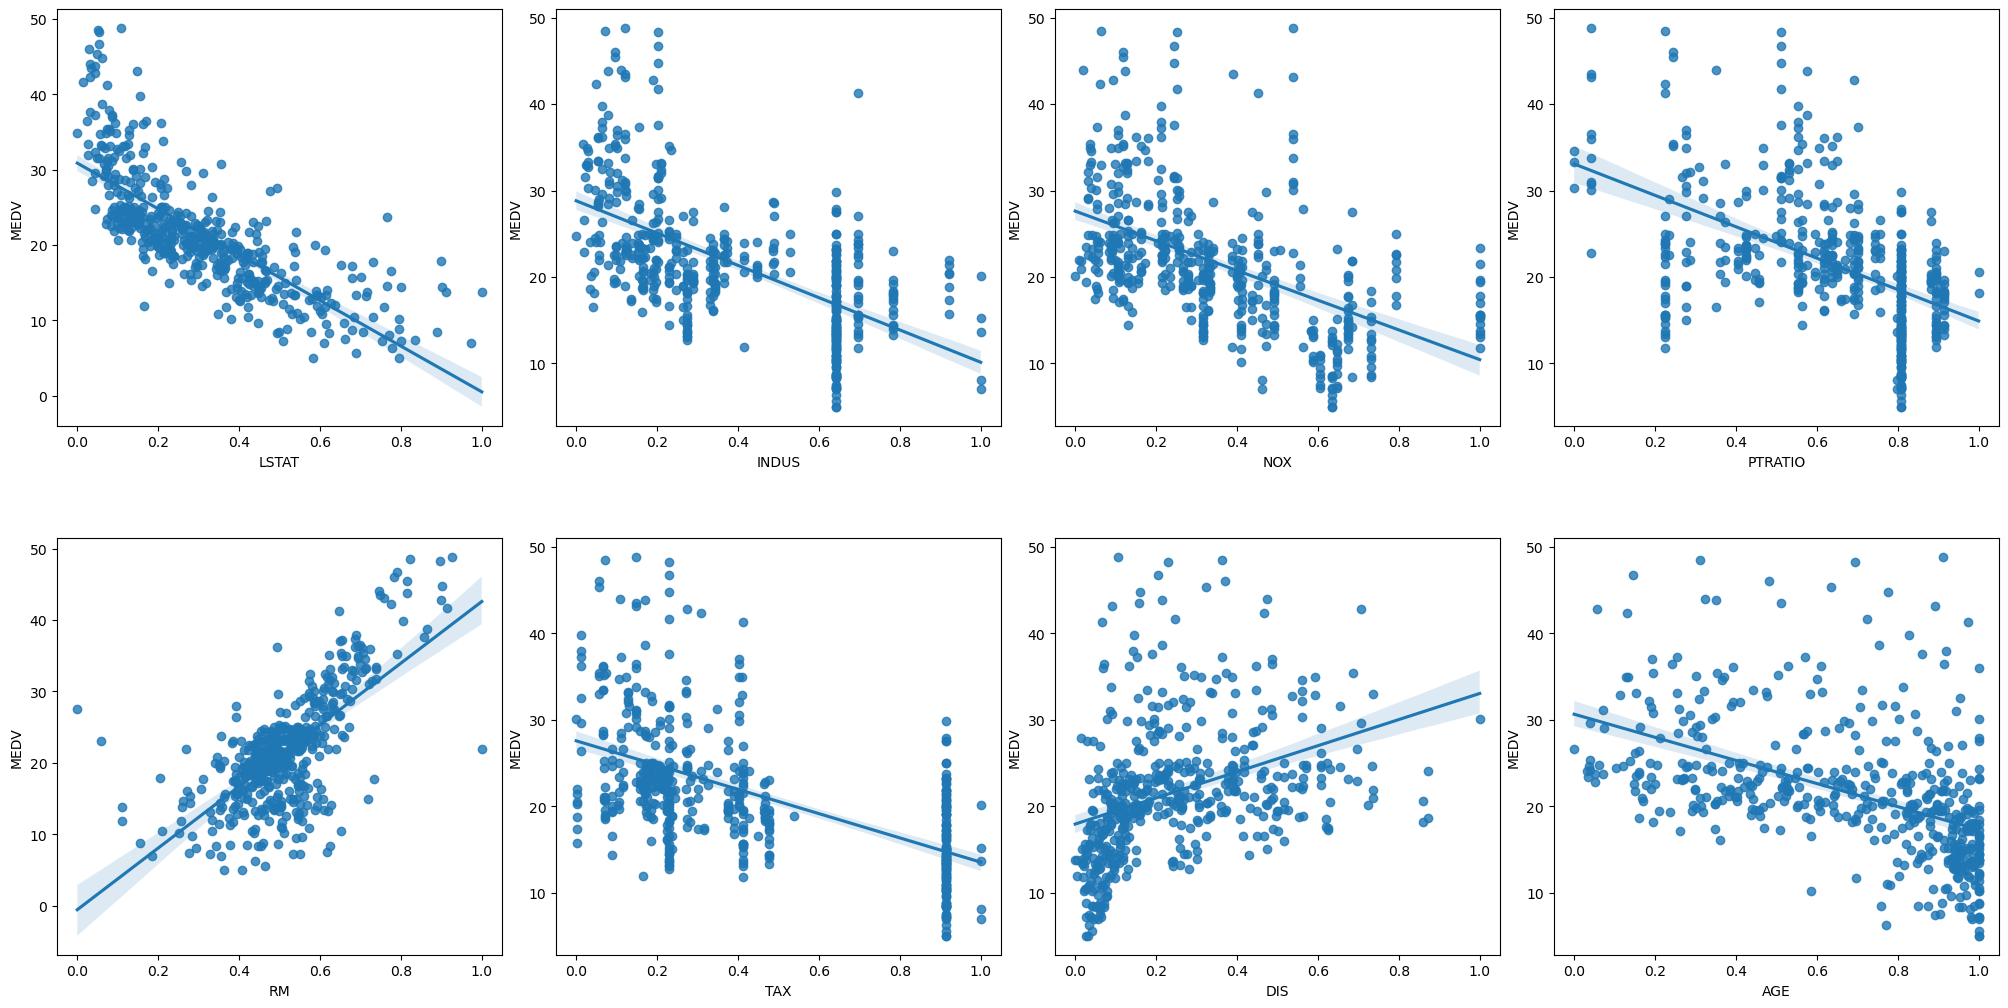

In [24]:
from sklearn import preprocessing
# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = data.loc[:,column_sels]
y = data['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


In [30]:
y =  np.log1p(y)
for col in x.columns:
    if np.abs(x[col].skew()) > 0.3:
        x[col] = np.log1p(x[col])

In [28]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import numpy as np

l_regression = linear_model.LinearRegression()
kf = KFold(n_splits=10)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
scores = cross_val_score(l_regression, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

scores_map = {}
scores_map['LinearRegression'] = scores
l_ridge = linear_model.Ridge()
scores = cross_val_score(l_ridge, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['Ridge'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

# Lets try polinomial regression with L2 with degree for the best fit
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
model = make_pipeline(PolynomialFeatures(degree=3), linear_model.Ridge())
scores = cross_val_score(model, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['PolyRidge'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -0.04 (+/- 0.04)
MSE: -0.04 (+/- 0.04)
MSE: -0.03 (+/- 0.03)
